<a href="https://colab.research.google.com/github/ahelmasri87/-AAI614_elmasri/blob/main/project_1_ahmadelmasri_finalversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Library**

In [ ]:
!pip install ucimlrepo

**Importing Data**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

**Getting Data Description**

In [ ]:
import pandas as pd

# Display the column names and data types
print("Columns and Data Types:\n", X.dtypes)

# Check the unique values of categorical columns
categorical_columns = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
]

for col in categorical_columns:
    print(f"\nUnique values in '{col}':\n", X[col].unique())

# Check for missing values
print("\nMissing values per column:\n", X.isnull().sum())


Columns and Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

Unique values in 'workclass':
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique values in 'education':
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values in 'marital-status':
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in 'occupation':
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-special

**Matching Data Description**

In [ ]:
df = pd.concat([X, y], axis=1)
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
# Question 1: Check the Columns of Your Data and Their Data Types

# Check the data types of each column
print(df.dtypes)

# Expected data types for each column
expected_types = {
    'age': 'int64',
    'workclass': 'object',
    'fnlwgt': 'int64',
    'education': 'object',
    'education-num': 'int64',  # Updated the column name here
    'marital-status': 'object',  # Updated the column name here
    'occupation': 'object',
    'relationship': 'object',
    'race': 'object',
    'sex': 'object',
    'capital-gain': 'int64',  # Updated the column name here
    'capital-loss': 'int64',  # Updated the column name here
    'hours-per-week': 'int64',  # Updated the column name here
    'native-country': 'object',  # Updated the column name here
    'income': 'object'
}

for column, expected_type in expected_types.items():
    actual_type = df[column].dtypes
    if actual_type == expected_type:
        print(f"{column}: Data type is as expected ({actual_type})")
    else:
        print(f"{column}: Unexpected data type ({actual_type}), expected ({expected_type})")



age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
age: Data type is as expected (int64)
workclass: Data type is as expected (object)
fnlwgt: Data type is as expected (int64)
education: Data type is as expected (object)
education-num: Data type is as expected (int64)
marital-status: Data type is as expected (object)
occupation: Data type is as expected (object)
relationship: Data type is as expected (object)
race: Data type is as expected (object)
sex: Data type is as expected (object)
capital-gain: Data type is as expected (int64)
capital-loss: Data type is as expected (int64)
hours-per-week: Data type is as expected (int64)
native-country: Data type is

In [ ]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


**Replacing and Counting missing values**

In [ ]:
import numpy as np

# Replace "?" with np.nan
df.replace("?", np.nan, inplace=True)

# Count missing values in each column
missing_values = df.isnull().sum()

print("Missing values per column:\n", missing_values)


Missing values per column:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


**Distribution of Capital-Gain and Capital-Loss**

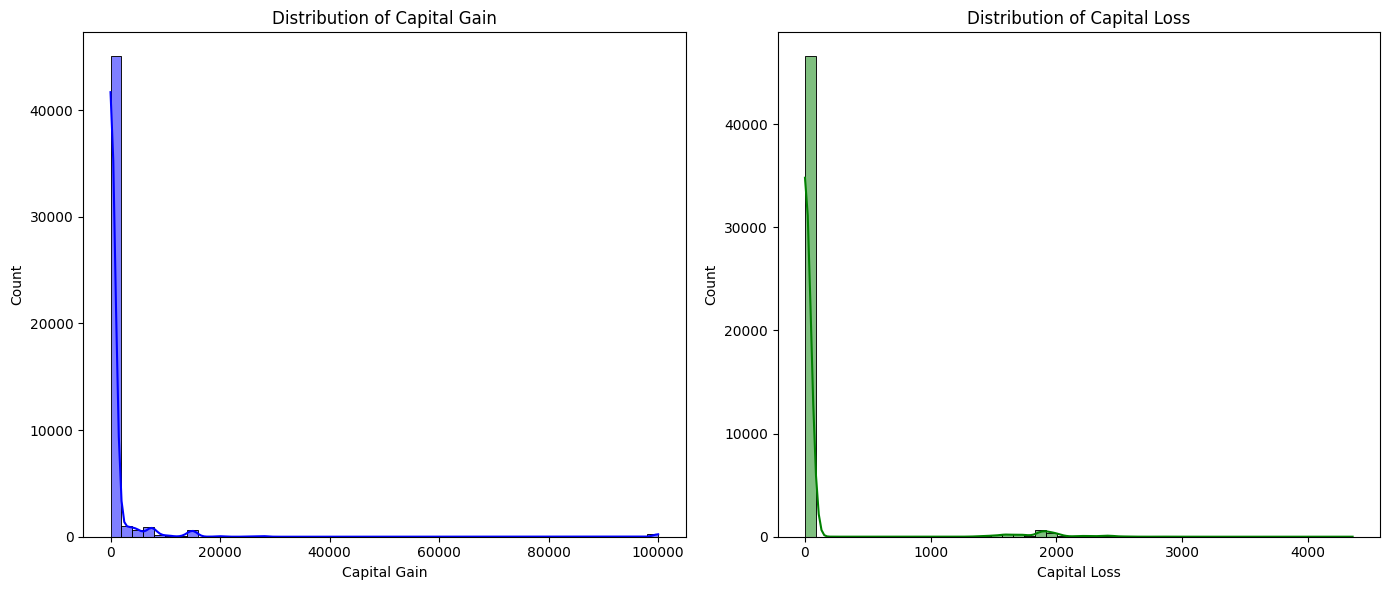

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'capital-gain' and 'capital-loss'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Capital Gain
sns.histplot(df['capital-gain'], kde=True, ax=ax[0], bins=50, color='blue')
ax[0].set_title('Distribution of Capital Gain')
ax[0].set_xlabel('Capital Gain')

# Capital Loss
sns.histplot(df['capital-loss'], kde=True, ax=ax[1], bins=50, color='green')
ax[1].set_title('Distribution of Capital Loss')
ax[1].set_xlabel('Capital Loss')

plt.tight_layout()
plt.show()


Data as we can see is hihgly skewed so we need to do Transformation

Why Transform:

If most values are zero with only a small proportion being non-zero, these variables could benefit from being binned into categories like "No Gain/Loss" (0) vs. "Has Gain/Loss" (positive values).
Continuous distributions with significant skew might need log transformation or quantile binning for better interpretability.

**Transformation Code**

In [ ]:
# Check if the median is zero
capital_gain_median = df['capital-gain'].median()
capital_loss_median = df['capital-loss'].median()

# Define bins dynamically
capital_gain_bins = [-1, 0, df['capital-gain'].max()] if capital_gain_median == 0 else [-1, 0, capital_gain_median, df['capital-gain'].max()]
capital_loss_bins = [-1, 0, df['capital-loss'].max()] if capital_loss_median == 0 else [-1, 0, capital_loss_median, df['capital-loss'].max()]

# Define labels dynamically
capital_gain_labels = ['No Gain', 'High Gain'] if capital_gain_median == 0 else ['No Gain', 'Low Gain', 'High Gain']
capital_loss_labels = ['No Loss', 'High Loss'] if capital_loss_median == 0 else ['No Loss', 'Low Loss', 'High Loss']

# Create categorical variables
df['capital_gain_category'] = pd.cut(df['capital-gain'], bins=capital_gain_bins, labels=capital_gain_labels, right=True)
df['capital_loss_category'] = pd.cut(df['capital-loss'], bins=capital_loss_bins, labels=capital_loss_labels, right=True)

# Display the distribution of new categories
print("Capital Gain Categories:\n", df['capital_gain_category'].value_counts())
print("\nCapital Loss Categories:\n", df['capital_loss_category'].value_counts())


Capital Gain Categories:
 capital_gain_category
No Gain      44807
High Gain     4035
Name: count, dtype: int64

Capital Loss Categories:
 capital_loss_category
No Loss      46560
High Loss     2282
Name: count, dtype: int64


**Visualize Categorical Distributions**

<ipython-input-10-e1e4bfd5d95d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='capital_gain_category', data=df, ax=ax[0], palette='Blues')
<ipython-input-10-e1e4bfd5d95d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='capital_loss_category', data=df, ax=ax[1], palette='Greens')


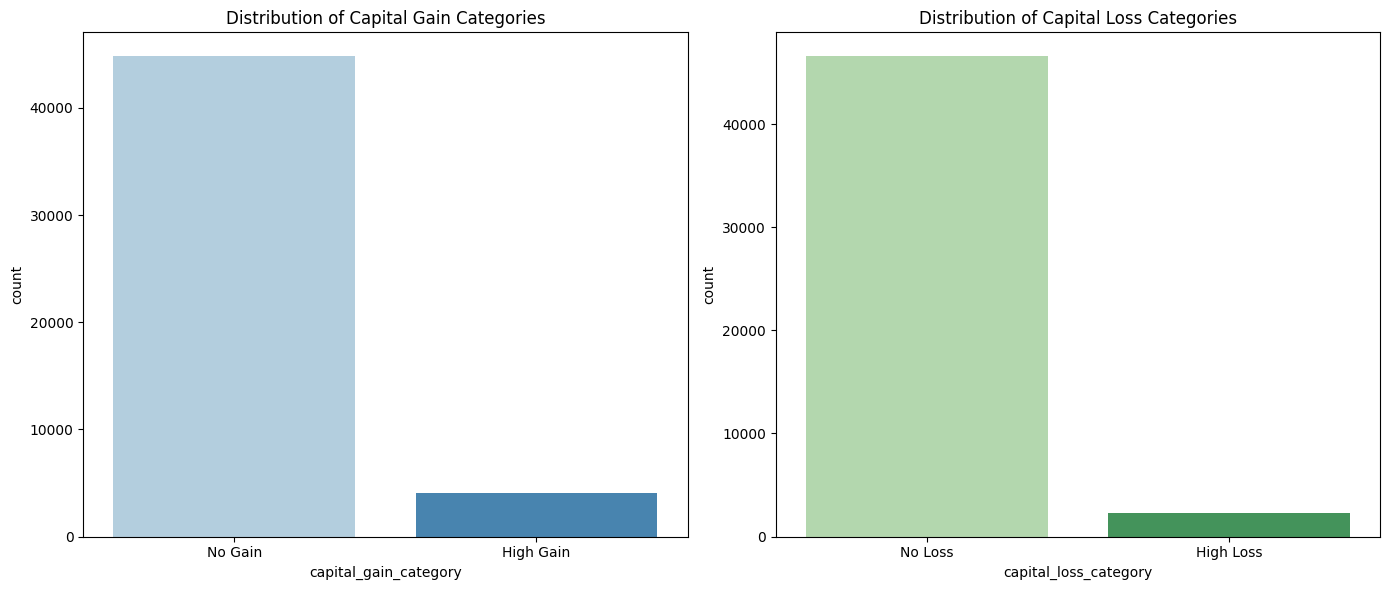

In [ ]:
# Plot the categorical distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Capital Gain Categories
sns.countplot(x='capital_gain_category', data=df, ax=ax[0], palette='Blues')
ax[0].set_title('Distribution of Capital Gain Categories')

# Capital Loss Categories
sns.countplot(x='capital_loss_category', data=df, ax=ax[1], palette='Greens')
ax[1].set_title('Distribution of Capital Loss Categories')

plt.tight_layout()
plt.show()


**Distribution of fnlwgt**

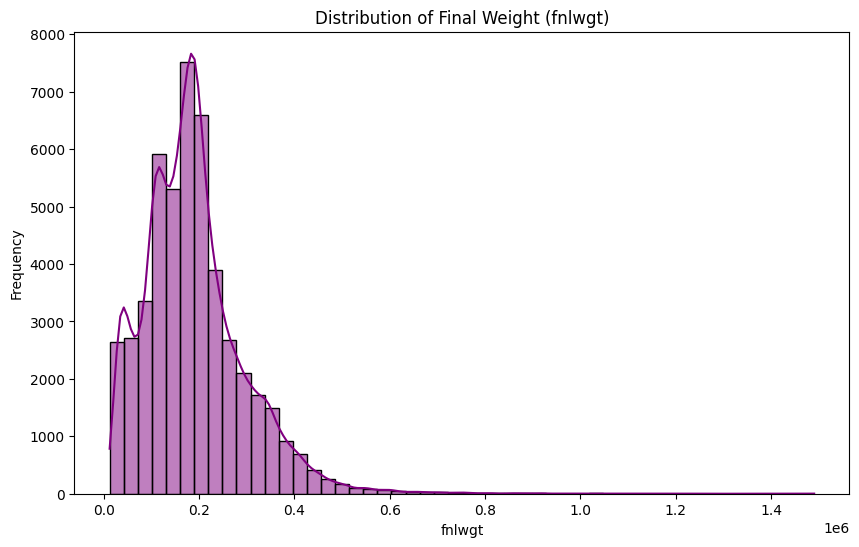

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of fnlwgt
plt.figure(figsize=(10, 6))
sns.histplot(df['fnlwgt'], kde=True, bins=50, color='purple')
plt.title('Distribution of Final Weight (fnlwgt)')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Summary statistics
print(df['fnlwgt'].describe())


count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


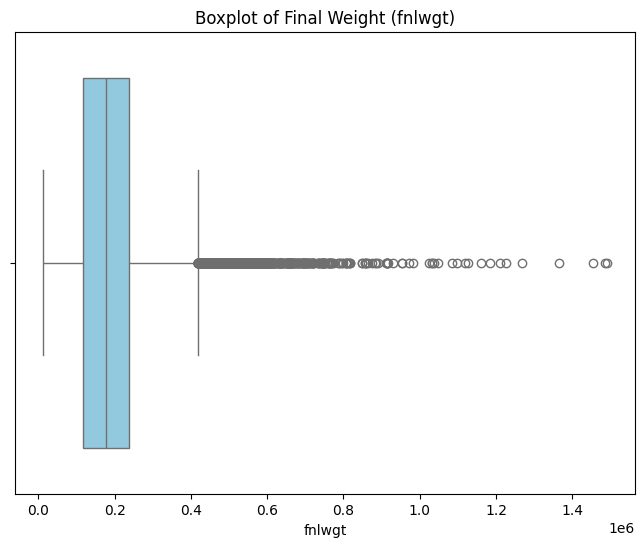

In [ ]:
# Boxplot for fnlwgt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['fnlwgt'], color='skyblue')
plt.title('Boxplot of Final Weight (fnlwgt)')
plt.show()


In [ ]:
# Weighted mean of a feature (e.g., age)
weighted_mean_age = (df['age'] * df['fnlwgt']).sum() / df['fnlwgt'].sum()
print("Weighted Mean Age:", weighted_mean_age)


Weighted Mean Age: 38.05862309067412


The weighted mean age of the individuals in the dataset, based on the fnlwgt (sampling weights), is approximately 38.06 years.

**Distribution of fnlwgt**

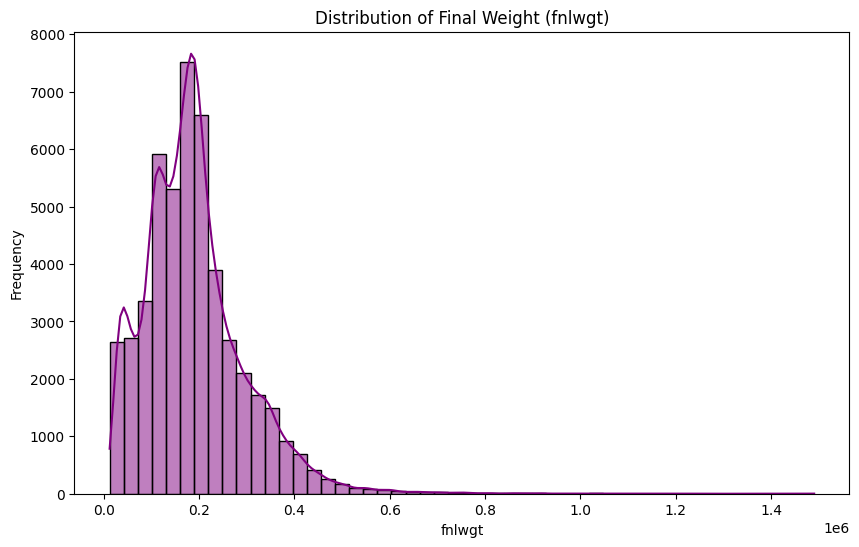

Summary Statistics for fnlwgt:
count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

Skewness of fnlwgt: 1.438847687943433


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Plot the distribution of fnlwgt
plt.figure(figsize=(10, 6))
sns.histplot(df['fnlwgt'], kde=True, bins=50, color='purple')
plt.title('Distribution of Final Weight (fnlwgt)')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Summary statistics and skewness
print("Summary Statistics for fnlwgt:")
print(df['fnlwgt'].describe())
print("\nSkewness of fnlwgt:", skew(df['fnlwgt'], nan_policy='omit'))


**Compare fnlwgt by gender**

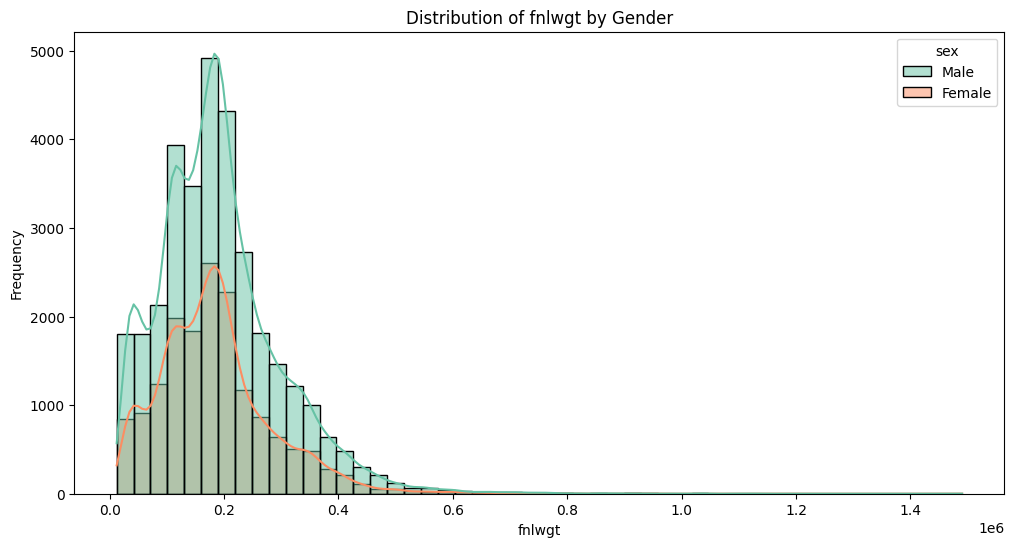

Summary Statistics by Gender:
           count           mean            std      min       25%       50%  \
sex                                                                          
Female  16192.0  185504.471714  103217.151490  12285.0  116560.0  175572.0   
Male    32650.0  191727.021623  106709.380155  13492.0  117963.0  180138.0   

              75%        max  
sex                           
Female  228609.25  1484705.0  
Male    241722.50  1490400.0  


In [ ]:
# Compare fnlwgt by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='fnlwgt', hue='sex', kde=True, bins=50, palette='Set2')
plt.title('Distribution of fnlwgt by Gender')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Summary statistics by gender
fnlwgt_by_gender = df.groupby('sex')['fnlwgt'].describe()
print("Summary Statistics by Gender:\n", fnlwgt_by_gender)


Mean fnlwgt is slightly higher for males (191,727.02) than for females (185,504.47). This indicates that, on average, the male sample represents a slightly larger proportion of the total population.

**Outliers**

In [ ]:
# Calculate IQR for fnlwgt
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['fnlwgt'] < lower_bound) | (df['fnlwgt'] > upper_bound)
print(f"Number of Outliers in fnlwgt: {outliers.sum()}")



Number of Outliers in fnlwgt: 1453


Outliers are individuals with unusually high or low sampling weights, which might represent rare or under-represented groups within the population.

**Reasons to Keep Outliers:**
In some cases, outliers may represent important, albeit rare, population segments that the model should account for.
If the dataset is intended to represent the entire population, excluding outliers may result in a loss of information about minority groups.

**Corelation HeatMap**

Correlation Matrix:
                     age  education-num  hours-per-week
age             1.000000       0.030940        0.071558
education-num   0.030940       1.000000        0.143689
hours-per-week  0.071558       0.143689        1.000000


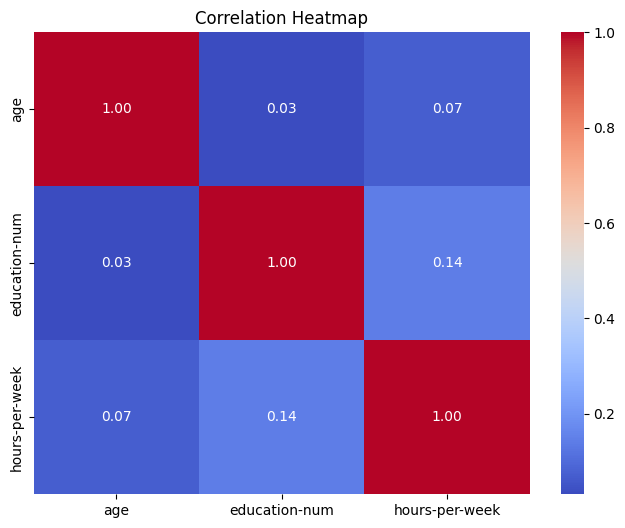

In [ ]:
# Select the relevant columns
correlation_data = df[['age', 'education-num', 'hours-per-week']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Question:**
**Do any of the variables appear to be correlated? How did you make your assessment?**

The low correlations indicate no strong linear relationships among these variables.

**Code for Statistical Testing**

In [ ]:
import scipy.stats as stats

# Define a function to calculate the p-value for Pearson's correlation test
def pearson_correlation_test(r, n):
    t_stat = r * (n - 2) ** 0.5 / (1 - r ** 2) ** 0.5
    p_value = stats.t.sf(np.abs(t_stat), df=n-2) * 2  # Two-tailed test
    return p_value

# Select the pairs with correlation > |0.1|
correlation_data = df[['age', 'education-num', 'hours-per-week']]
correlation_matrix = correlation_data.corr()

# Testing pairs with correlation > |0.1|
test_results = {}
n = len(df)

for var1 in correlation_data.columns:
    for var2 in correlation_data.columns:
        if var1 != var2 and abs(correlation_matrix.loc[var1, var2]) > 0.1:
            r = correlation_matrix.loc[var1, var2]
            p_value = pearson_correlation_test(r, n)
            test_results[(var1, var2)] = (r, p_value)

# Display the test results
for pair, (r, p) in test_results.items():
    print(f"Correlation between {pair[0]} and {pair[1]}: r = {r:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Result is statistically significant.")
    else:
        print("Result is not statistically significant.")


Correlation between education-num and hours-per-week: r = 0.14, p-value = 0.0000
Result is statistically significant.
Correlation between hours-per-week and education-num: r = 0.14, p-value = 0.0000
Result is statistically significant.


The positive correlation aligns with the expectation that individuals with more years of education tend to work slightly more hours per week on average, though the strength of this relationship is weak.
This finding suggests that education level might have a small influence on working hours, but other factors are likely at play as well.

**Compare the Correlation**

In [ ]:
# Separate the data by gender
male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

# Calculate the correlation for both groups
male_corr = male_data[['age', 'education-num']].corr().loc['age', 'education-num']
female_corr = female_data[['age', 'education-num']].corr().loc['age', 'education-num']

# Perform the Pearson correlation significance test for both groups
male_p_value = pearson_correlation_test(male_corr, len(male_data))
female_p_value = pearson_correlation_test(female_corr, len(female_data))

# Display the results
print(f"Male participants - Correlation: {male_corr:.2f}, p-value: {male_p_value:.4f}")
print(f"Female participants - Correlation: {female_corr:.2f}, p-value: {female_p_value:.4f}")

# Check significance
if male_p_value < 0.05:
    print("Male correlation result is statistically significant.")
else:
    print("Male correlation result is not statistically significant.")

if female_p_value < 0.05:
    print("Female correlation result is statistically significant.")
else:
    print("Female correlation result is not statistically significant.")


Male participants - Correlation: 0.05, p-value: 0.0000
Female participants - Correlation: -0.02, p-value: 0.0092
Male correlation result is statistically significant.
Female correlation result is statistically significant.


The relationship between education_num and age is weak but statistically significant for both males and females.
There are noticeable gender differences in the direction of the correlation, with males showing a small positive correlation and females showing a very slight negative one.

**Covariance Matrix**

In [ ]:
# Compute the covariance matrix between education_num and hours_per_week
cov_matrix = df[['education-num', 'hours-per-week']].cov()

# Display the covariance matrix
print(cov_matrix)


                education-num  hours-per-week
education-num        6.609901        4.577651
hours-per-week       4.577651      153.547885


Positive Covariance: The positive covariance (4.58) suggests that there is a slight tendency for individuals with more years of education to work more hours per week. However, the covariance is relatively small, indicating that the relationship is weak.
Magnitude of Covariance: The magnitude of the covariance isn't very large compared to the variances of the variables. This means that while there is a positive relationship, it isn't very strong or consistent.

**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert the target variable 'income' to binary (0 for <=50K, 1 for >50K)
y = adult.data.targets.map(lambda x: 1 if x == ">50K" else 0)

# Define feature matrix X
X = adult.data.features

# One-hot encode categorical features
categorical_columns = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
]

# Create a preprocessor with one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', X.columns.difference(categorical_columns))
    ])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8426
Confusion Matrix:
[[7891  316]
 [1222  340]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Convert the target variable 'income' to binary (0 for <=50K, 1 for >50K)
y = adult.data.targets.map(lambda x: 1 if x == ">50K" else 0)

# Define feature matrix X
X = adult.data.features

# One-hot encode categorical features
categorical_columns = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
]

# Create a preprocessor with one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', X.columns.difference(categorical_columns))
    ])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.1081
R-squared: 0.1955


**As this is a binary classification problem Logistic regression only makes sense for this type of dataset. Linear regression is used when you are trying to predict a continous number**